# JUPYTER NOTEBOOK FOR HOMEWORK 2
Segment the foreground from one image and transfer it to another image

In [11]:
import numpy as np
import skimage
from skimage.transform import resize
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from scipy.ndimage.filters import convolve
import os
from sklearn.cluster import KMeans

from makeLMfilters import makeLMfilters


In [12]:
COLOR_SCHEME = 'rgb'

In [13]:
#Read and display the image to analye
def load_img(filename):
    if os.path.isfile(os.getcwd() + '/' + filename):
        img = mpimg.imread(filename)
    return img

In [14]:
img = load_img('images/dog.jpg')

In [15]:
#Convert the image to grayscale

#   Define a function segmentImg which takes in an image and returns the foreground labels
#   The arguments to segmentImg are imgFilename
#   and k (the number of clusters)
def segmentImg(imgFileName, k):
    #1. Load and display the image from which you want to segment the foreground from the background
    img1 = load_img(imgFileName)
    
    # Convert the image to grayscale
    img = skimage.color.rgb2gray(img1)
    
    #2. Create an overcomplete bank of filters F (make sure you check the dimensions of the returned array)
    #
    f = makeLMfilters()

    #3. Convolve the input image with every filter in the bank of filters 
    #   to get a response array 
    imgs = np.zeros((img.shape[0], img.shape[1], f.shape[2]))
    
    for i in range(0,f.shape[2]):
        imgs[:,:,i]= convolve(img, f[:,:,i])
        
    imgs = np.asarray(imgs)
    
    
    #4.Take the absolute values of the responses and 
    #  reshape the reponse tensor into a matrix of size [row*cols, num_filters]
    imgs = np.abs(imgs)
    imgs = np.reshape(imgs, (img.shape[0]*img.shape[1], f.shape[2]))
    
    
    #5. Run k-means on the vectorized reponses X to get a vector of labels (the clusters); 
    #  
    km = KMeans(k).fit(imgs)
    
    #6. Reshape the label results of k-means so that it has the same size as the input image
    #   Return the label image which we call idx
    
    idx = np.reshape(km.labels_, (img.shape[0], img.shape[1]))
    
    print('***Segmentation done***')
    return idx

In [16]:
"""
You are now given a second function tansferImg with the arguments:
    fgs: foreground label ids from clustering
    idxImg: the reshaped indexed image also from clustering
    sImgFilename: source image (a color image to pick pixels from)
    tImgFilename: target image (also a color image to transfer pixels to)
    This function is customized to work for the images provided for the homework
"""
def transferImg(fgs, idxImg, sImgFilename, tImgFilename):

    # Read the images, estimate their dimensions
    sImg = skimage.io.imread(sImgFilename)
    tImg = skimage.io.imread(tImgFilename)
    rows, cols, clrs = sImg.shape

    # Crop the source and indexed images
    idxImg = idxImg[25:rows-25, 25:cols-25]
    sImg = sImg[25:rows-25, 25:cols-25]
    rows, cols, clrs = sImg.shape
    
    # Resize them by so they fit in target file, tImg
    idxImg = resize(idxImg,(int(idxImg.shape[0]/1.5), int(idxImg.shape[1]/1.5)),anti_aliasing=True, preserve_range=True)
    idxImg = idxImg.astype(np.uint8)
    print(idxImg)
    sImg = resize(sImg, (int(sImg.shape[0]/1.5), int(sImg.shape[1]/1.5)), anti_aliasing=True, preserve_range=True)
    sImg = sImg.astype(np.uint8)
    rows, cols, clrs = sImg.shape
    
    # Transfer idx onto tImg
    for i in range(rows): 
        for j in range(cols):
            if idxImg[i,j] in fgs:
                # Coordinate offsets from boundary
                iOff = i+200
                jOff = j+100 
                tImg[iOff,jOff,0] = sImg[i,j,0]
                tImg[iOff,jOff,1] = sImg[i,j,1]
                tImg[iOff,jOff,2] = sImg[i,j,2]

    print('***transfer done')
    plt.imshow(tImg)
    plt.show()
    return tImg


[[0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]
***transfer done


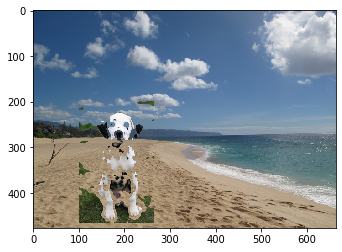

In [25]:
#7. Test your segmentation function with an image file and # of clusters, k
# Below is an example of how to call the transfer function
#
# idx = segmentImg('images/dog.jpg', 3)
# Insert only the numbers that correspond to the foreground labels in the transferImg function
trImg = transferImg([1,2], idx, 'images/dog.jpg', 'images/bg.jpg')

In [18]:
#8. Write a new function segmentImgClr with the same arguments as segmentImg
#   But this time, instead of features based on filter responses, just use color
#   Try different colorspaces
def segmentImgClr(imgFileName, k):
    #1. Load and display the image from which you want to segment the foreground from the background
    img1 = load_img(imgFileName)
    
    # Choose color scheme
    if COLOR_SCHEME == 'hsv':
        img = skimage.color.rgb2hsv(img1)
    elif COLOR_SCHEME == 'Lab':
        img = skimage.color.rgb2lab(img1)
    elif COLOR_SCHEME == 'Lab-L':
        img = skimage.color.rgb2lab(img1)
        img = img[:,:,1:]
    else:
        img= img1
        
    #4.Take the absolute values of the responses and 
    #  reshape the reponse tensor into a matrix of size [row*cols, num_filters]
    imgs = np.reshape(np.abs(img), (img.shape[0]*img.shape[1], img.shape[2]))
    
    
    #5. Run k-means on the vectorized reponses X to get a vector of labels (the clusters); 
    #  
    km = KMeans(k).fit(imgs)
    
    #6. Reshape the label results of k-means so that it has the same size as the input image
    #   Return the label image which we call idx
    
    idx = np.reshape(km.labels_, (img.shape[0], img.shape[1]))
    
    print('***Segmentation done***')
    return idx


/Users/manc/anaconda3/lib/python3.7/site-packages/skimage/color/colorconv.py:265: RuntimeWarning: divide by zero encountered in true_divide
  out_s = delta / out_v
/Users/manc/anaconda3/lib/python3.7/site-packages/skimage/color/colorconv.py:271: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = (arr[idx, 1] - arr[idx, 2]) / delta[idx]
/Users/manc/anaconda3/lib/python3.7/site-packages/skimage/color/colorconv.py:275: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 2. + (arr[idx, 2] - arr[idx, 0]) / delta[idx]
/Users/manc/anaconda3/lib/python3.7/site-packages/skimage/color/colorconv.py:279: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 4. + (arr[idx, 0] - arr[idx, 1]) / delta[idx]


***Segmentation done***
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
***transfer done


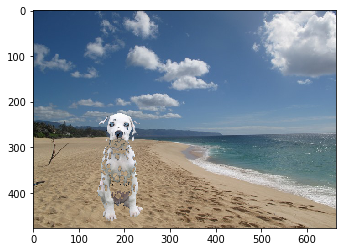

In [19]:
#9. Again test your new color-based segmentation function
#   The same transferImg function should work here also.
COLOR_SCHEME = 'hsv'
idx2 = segmentImgClr('images/dog.jpg', 3)

# Change first parameter list to the cluster that represent foreground
trImg2 = transferImg([1,2], idx2, 'images/dog.jpg', 'images/bg.jpg') #with HSV

***Segmentation done***
[[1 1 1 ... 0 1 1]
 [1 1 1 ... 0 1 1]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
***transfer done


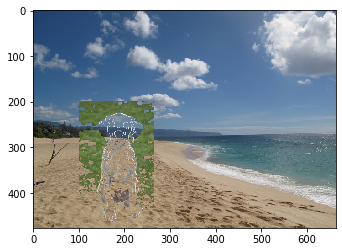

In [20]:
# 10 Test with a different colorspace
COLOR_SCHEME = 'rgb'
idx3 = segmentImgClr('images/dog.jpg', 3)

# Change first parameter list to the cluster that represent foreground
trImg3 = transferImg([1], idx3, 'images/dog.jpg', 'images/bg.jpg') #with RGB

***Segmentation done***
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [2 1 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [0 0 1 ... 0 1 0]]
***transfer done


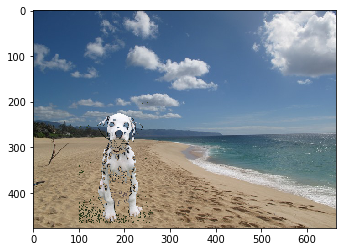

In [21]:
# 10 Test with a different colorspace
COLOR_SCHEME = 'Lab'
idx4 = segmentImgClr('images/dog.jpg', 3)

# Change first parameter list to the cluster that represent foreground
trImg4 = transferImg([1], idx4, 'images/dog.jpg', 'images/bg.jpg') #with Lab

***Segmentation done***
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]
***transfer done


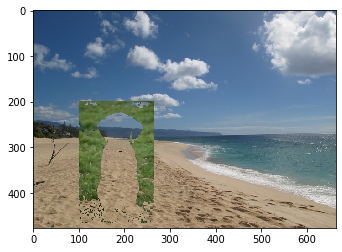

In [22]:
# 10 Test with a different colorspace
COLOR_SCHEME = 'Lab-L'
idx5 = segmentImgClr('images/dog.jpg', 3)

# Change first parameter list to the cluster that represent foreground
trImg5 = transferImg([1], idx5, 'images/dog.jpg', 'images/bg.jpg') #with only a and b from Lab

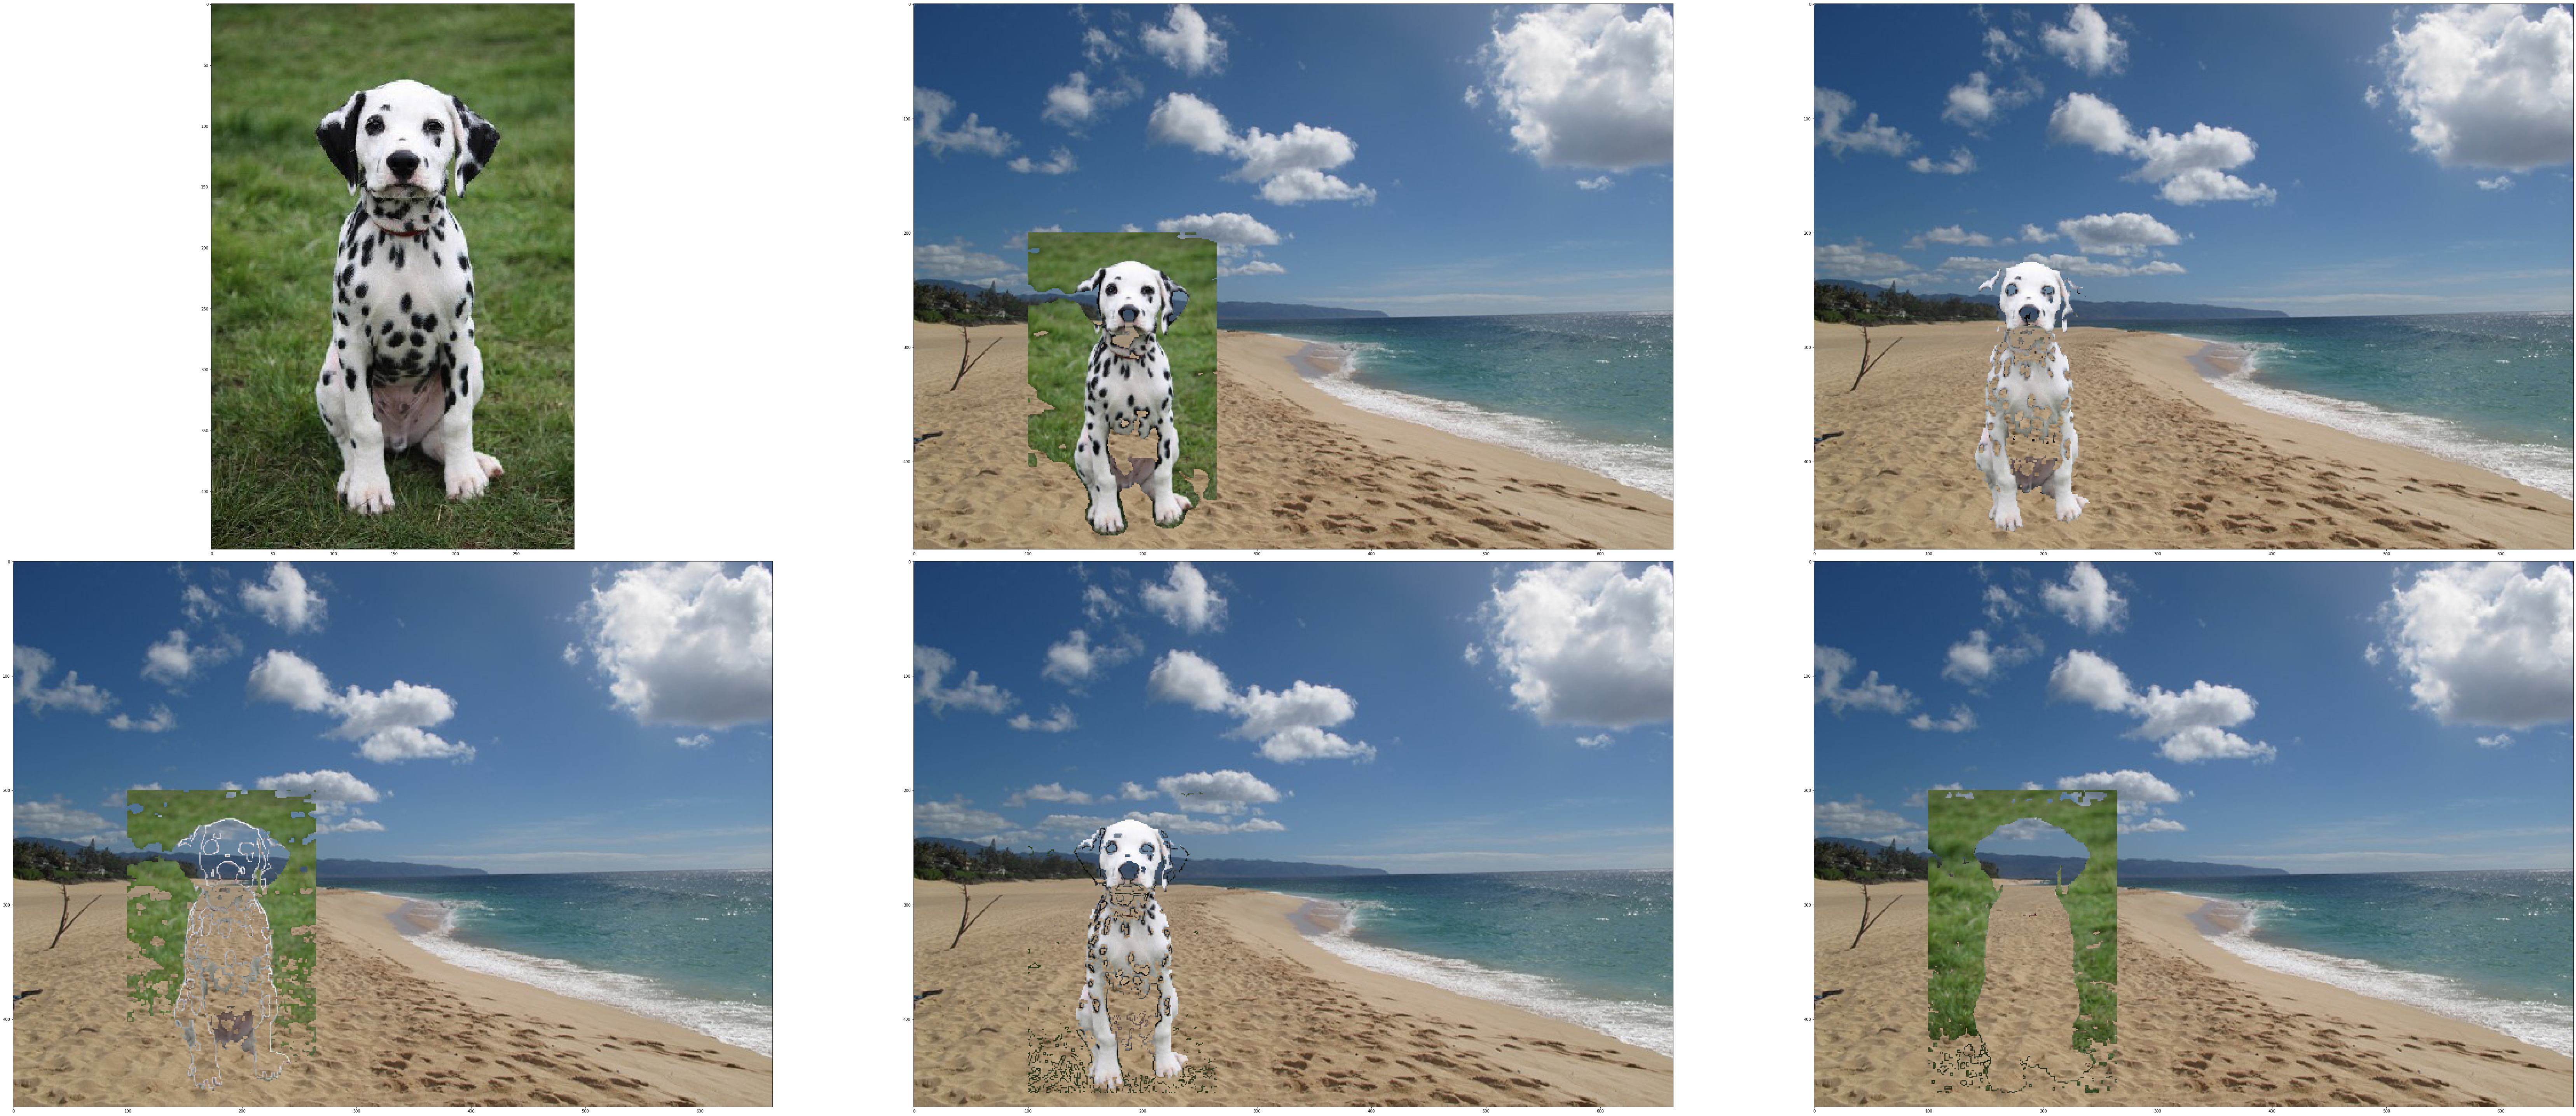

In [23]:
# Display the original image and the result
fig, axes = plt.subplots(2, 3, figsize=(100, 40))
ax = axes.ravel()
ax[0].imshow(img)
ax[1].imshow(trImg)
ax[2].imshow(trImg2)
ax[3].imshow(trImg3)
ax[4].imshow(trImg4)
ax[5].imshow(trImg5)
fig.tight_layout()
plt.show()